In [154]:
##############################
# CA-1c                      #
# B8IT109 rev1c              #
##############################

In [155]:
#This data set consists of:
#* 100,000 ratings (1-5) from 943 users on 1682 movies. 
#* Each user has rated at least 20 movies. 
#* Simple demographic info for the users (age, gender, occupation, zip)


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pylab as pl
import csv as csv


In [157]:
#u_col = ['occupation']
#df_occupation=pd.read_csv("C:\Users\harris\Documents\Maria's folder\DBS\Advanced_Analytics\CA1c\ml-100k\ml-100k\u.occupation")

#u_user is user file
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
df_users = pd.read_csv("C:\Users\harris\Documents\Maria's folder\DBS\Advanced_Analytics\CA1c\ml-100k\ml-100k/u.user", sep='|', names=user_cols)

#u.data is ratings file
#rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
df_ratings = pd.read_csv("C:\Users\harris\Documents\Maria's folder\DBS\Advanced_Analytics\CA1c\ml-100k\ml-100k/u.data", sep='\t', names=rating_cols)

#u.item is movie file
movie_cols = ["movie_id", "title", "release_date","video release_date","IMDb URL","unknown","Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
df_movies = pd.read_csv("C:\Users\harris\Documents\Maria's folder\DBS\Advanced_Analytics\CA1c\ml-100k\ml-100k/u.item", sep='|',names=movie_cols)

 
genre_cols=['genre','genre_id']
df_genres=pd.read_csv("C:\Users\harris\Documents\Maria's folder\DBS\Advanced_Analytics\CA1c\ml-100k\ml-100k\u.genre", sep='|', names=genre_cols)
df_genres.head(20)




,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [158]:
df_users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [159]:
df_ratings.head(10)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [160]:
df_movies.head(10)
#df['occupation'].value_counts()

,movie_id,title,release_date,video release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [161]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [162]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video release_date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children's            1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

In [163]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id           100000 non-null int64
movie_id          100000 non-null int64
rating            100000 non-null int64
unix_timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [164]:
df_users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [165]:
df_ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [166]:
df_movies.describe()

,movie_id,video release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
#merge the movies and the ratings files and store in new dataframe called movie_ratings
df_movie_ratings = pd.merge(df_movies, df_ratings)

In [168]:
df_movie_ratings.head(30)

,movie_id,title,release_date,video release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,66,3,883601324
5,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,5,4,875635748
6,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,109,4,880563619
7,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,181,3,878962392
8,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,95,5,879197329
9,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,268,3,875742341


In [169]:
df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 27 columns):
movie_id              100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video release_date    0 non-null float64
IMDb URL              99987 non-null object
unknown               100000 non-null int64
Action                100000 non-null int64
Adventure             100000 non-null int64
Animation             100000 non-null int64
Children's            100000 non-null int64
Comedy                100000 non-null int64
Crime                 100000 non-null int64
Documentary           100000 non-null int64
Drama                 100000 non-null int64
Fantasy               100000 non-null int64
Film-Noir             100000 non-null int64
Horror                100000 non-null int64
Musical               100000 non-null int64
Mystery               100000 non-null int64
Romance               100000 non-null int64
Sci-Fi      

In [170]:
df_movie_ratings.tail(30)

,movie_id,title,release_date,video release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,unix_timestamp
99970,1658,"Substance of Fire, The (1996)",06-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Substance%20o...,0,0,0,0,0,...,0,0,0,0,0,0,0,894,4,882404137
99971,1659,Getting Away With Murder (1996),12-Apr-1996,NaN,http://us.imdb.com/Title?Getting+Away+With+Mur...,0,0,0,0,0,...,0,0,0,0,0,0,0,747,1,888733313
99972,1660,Small Faces (1995),09-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Small%20Faces...,0,0,0,0,0,...,0,0,0,0,0,0,0,747,2,888640731
99973,1661,"New Age, The (1994)",01-Jan-1994,NaN,"http://us.imdb.com/M/title-exact?New%20Age,%20...",0,0,0,0,0,...,0,0,0,0,0,0,0,751,1,889299429
99974,1662,Rough Magic (1995),30-May-1997,NaN,http://us.imdb.com/M/title-exact?Rough%20Magic...,0,0,0,0,0,...,0,0,1,0,0,0,0,762,1,878719324
99975,1662,Rough Magic (1995),30-May-1997,NaN,http://us.imdb.com/M/title-exact?Rough%20Magic...,0,0,0,0,0,...,0,0,1,0,0,0,0,782,4,891500110
99976,1663,Nothing Personal (1995),30-Apr-1997,NaN,http://us.imdb.com/M/title-exact?Nothing%20Per...,0,0,0,0,0,...,0,0,0,0,0,1,0,782,2,891499700
99977,1664,8 Heads in a Duffel Bag (1997),18-Apr-1997,NaN,http://us.imdb.com/Title?8+Heads+in+a+Duffel+B...,0,0,0,0,0,...,0,0,0,0,0,0,0,839,1,875752902
99978,1664,8 Heads in a Duffel Bag (1997),18-Apr-1997,NaN,http://us.imdb.com/Title?8+Heads+in+a+Duffel+B...,0,0,0,0,0,...,0,0,0,0,0,0,0,880,4,892958799
99979,1664,8 Heads in a Duffel Bag (1997),18-Apr-1997,NaN,http://us.imdb.com/Title?8+Heads+in+a+Duffel+B...,0,0,0,0,0,...,0,0,0,0,0,0,0,782,4,891499699


In [171]:
#merge the merged file above called movie_ratings with the users file
#and call it movie file
df_moviefile = pd.merge(df_movie_ratings,df_users)

In [172]:
df_moviefile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 31 columns):
movie_id              100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video release_date    0 non-null float64
IMDb URL              99987 non-null object
unknown               100000 non-null int64
Action                100000 non-null int64
Adventure             100000 non-null int64
Animation             100000 non-null int64
Children's            100000 non-null int64
Comedy                100000 non-null int64
Crime                 100000 non-null int64
Documentary           100000 non-null int64
Drama                 100000 non-null int64
Fantasy               100000 non-null int64
Film-Noir             100000 non-null int64
Horror                100000 non-null int64
Musical               100000 non-null int64
Mystery               100000 non-null int64
Romance               100000 non-null int64
Sci-Fi      

In [173]:
#print 1st 20 records of the merged file
df_moviefile.head(20)

,movie_id,title,release_date,video release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,gender,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,308,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),0,0,0,0,0,...,1,0,0,308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,0,...,1,0,0,308,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,0,0,0,0,0,...,0,0,0,308,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,0,1,0,0,0,...,1,0,0,308,4,887739056,60,M,retired,95076


In [174]:
#group file by title and sort them by the most popular
most_rated=df_moviefile.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [175]:
#list the movies by title
df_moviefile.title

0                              Toy Story (1995)
1                             Get Shorty (1995)
2                                Copycat (1995)
3                         Twelve Monkeys (1995)
4                                   Babe (1995)
5                       Dead Man Walking (1995)
6                          Seven (Se7en) (1995)
7                    Usual Suspects, The (1995)
8                     Mr. Holland's Opus (1995)
9                    From Dusk Till Dawn (1996)
10                        Antonia's Line (1995)
11                Muppet Treasure Island (1996)
12                            Braveheart (1995)
13                           Taxi Driver (1976)
14                   Rumble in the Bronx (1995)
15                         Birdcage, The (1996)
16                             Apollo 13 (1995)
17                         Belle de jour (1967)
18                          Crimson Tide (1995)
19                                 Crumb (1994)
20                                Clerks

In [176]:
df_moviefile.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

In [177]:
df_users['occupation'].head(10)

0       technician
1            other
2           writer
3       technician
4            other
5        executive
6    administrator
7    administrator
8          student
9           lawyer
Name: occupation, dtype: object

In [178]:
df_genres['genre'].head(20)

0         unknown
1          Action
2       Adventure
3       Animation
4      Children's
5          Comedy
6           Crime
7     Documentary
8           Drama
9         Fantasy
10      Film-Noir
11         Horror
12        Musical
13        Mystery
14        Romance
15         Sci-Fi
16       Thriller
17            War
18        Western
Name: genre, dtype: object

In [179]:
by_occupation=df_moviefile.groupby('occupation')
by_occupation

In [198]:
#count no.of records per column per occupation
print by_occupation.head()

       movie_id                            title release_date  \
0             1                 Toy Story (1995)  01-Jan-1995   
1             4                Get Shorty (1995)  01-Jan-1995   
2             5                   Copycat (1995)  01-Jan-1995   
3             7            Twelve Monkeys (1995)  01-Jan-1995   
4             8                      Babe (1995)  01-Jan-1995   
397           1                 Toy Story (1995)  01-Jan-1995   
398           4                Get Shorty (1995)  01-Jan-1995   
399           9          Dead Man Walking (1995)  01-Jan-1995   
400          11             Seven (Se7en) (1995)  01-Jan-1995   
401          28                 Apollo 13 (1995)  01-Jan-1995   
459           1                 Toy Story (1995)  01-Jan-1995   
460           7            Twelve Monkeys (1995)  01-Jan-1995   
461           8                      Babe (1995)  01-Jan-1995   
462          50                 Star Wars (1977)  01-Jan-1977   
463          56          

In [181]:
#frequency distribution for occupation
df_moviefile['occupation'].value_counts()

student          21957
other            10663
educator          9442
engineer          8175
programmer        7801
administrator     7479
writer            5536
librarian         5273
technician        3506
executive         3403
healthcare        2804
artist            2308
entertainment     2095
scientist         2058
marketing         1950
retired           1609
lawyer            1345
none               901
salesman           856
doctor             540
homemaker          299
Name: occupation, dtype: int64

In [255]:
#frequency of 'action' films by occupation
by_occupation['Action'].value_counts()   

occupation     Action
administrator  0          5621
               1          1858
artist         0          1780
               1           528
doctor         0           430
               1           110
educator       0          7480
               1          1962
engineer       0          5898
               1          2277
entertainment  0          1596
               1           499
executive      0          2595
               1           808
healthcare     0          2227
               1           577
homemaker      0           207
               1            92
lawyer         0          1062
               1           283
librarian      0          4285
               1           988
marketing      0          1473
               1           477
none           0           600
               1           301
other          0          7991
               1          2672
programmer     0          5479
               1          2322
retired        0          1331
               1 

In [204]:
#frequency of 'thriller' movies by occupation
by_occupation['Thriller'].value_counts() 

occupation     Thriller
administrator  0            5909
               1            1570
artist         0            1832
               1             476
doctor         0             423
               1             117
educator       0            7675
               1            1767
engineer       0            6463
               1            1712
entertainment  0            1541
               1             554
executive      0            2592
               1             811
healthcare     0            2241
               1             563
homemaker      0             204
               1              95
lawyer         0            1098
               1             247
librarian      0            4296
               1             977
marketing      0            1508
               1             442
none           0             639
               1             262
other          0            8342
               1            2321
programmer     0            6051
               1   

In [210]:
#all movies watched by technicians
df_moviefile[df_moviefile.occupation == 'technician']


,movie_id,title,release_date,video release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,gender,occupation,zip_code
6896,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,311,4,884963202,32,M,technician,73071
6897,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,311,3,884365853,32,M,technician,73071
6898,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,311,4,884364465,32,M,technician,73071
6899,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,311,4,884963365,32,M,technician,73071
6900,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,0,...,1,0,0,311,4,884364436,32,M,technician,73071
6901,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,0,0,0,0,0,...,0,0,0,311,5,884963136,32,M,technician,73071
6902,22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0,0,0,...,0,1,0,311,4,884364538,32,M,technician,73071
6903,23,Taxi Driver (1976),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Taxi%20Driver...,0,0,0,0,0,...,1,0,0,311,3,884364570,32,M,technician,73071
6904,28,Apollo 13 (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Apollo%2013%2...,0,1,0,0,0,...,1,0,0,311,5,884365140,32,M,technician,73071
6905,31,Crimson Tide (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Crimson%20Tid...,0,0,0,0,0,...,1,1,0,311,4,884364570,32,M,technician,73071


In [245]:
#all movies watched by students
df_moviefile[df_moviefile.occupation == 'student']

,movie_id,title,release_date,video release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,gender,occupation,zip_code
782,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,66,3,883601324,23,M,student,80521
783,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,66,3,883601355,23,M,student,80521
784,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,66,4,883601265,23,M,student,80521
785,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,0,0,0,0,0,...,0,0,0,66,3,883601456,23,M,student,80521
786,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...,0,1,1,0,0,...,1,0,0,66,1,883601939,23,M,student,80521
787,24,Rumble in the Bronx (1995),23-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Hong%20Faan%2...,0,1,1,0,0,...,0,0,0,66,3,883601582,23,M,student,80521
788,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,...,0,1,0,66,5,883601236,23,M,student,80521
789,117,"Rock, The (1996)",07-Jun-1996,NaN,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,...,1,0,0,66,3,883601787,23,M,student,80521
790,121,Independence Day (ID4) (1996),03-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Independence%...,0,1,0,0,0,...,0,1,0,66,3,883601834,23,M,student,80521
791,127,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,...,0,0,0,66,4,883601156,23,M,student,80521


In [238]:
#sort action movies into a new dataframe 
by_action_movies=df_moviefile[df_moviefile.Action == 1]

In [239]:
#show 1st 10 action movies
by_action_movies.head(10)

,movie_id,title,release_date,video release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,gender,occupation,zip_code
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,0,1,0,0,0,...,1,0,0,308,4,887739056,60,M,retired,95076
11,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...,0,1,1,0,0,...,1,0,0,308,3,887740729,60,M,retired,95076
12,22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0,0,0,...,0,1,0,308,4,887737647,60,M,retired,95076
14,24,Rumble in the Bronx (1995),23-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Hong%20Faan%2...,0,1,1,0,0,...,0,0,0,308,4,887738057,60,M,retired,95076
16,28,Apollo 13 (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Apollo%2013%2...,0,1,0,0,0,...,1,0,0,308,3,887737036,60,M,retired,95076
26,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,...,0,1,0,308,5,887737431,60,M,retired,95076
27,54,Outbreak (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Outbreak%20(1...,0,1,0,0,0,...,1,0,0,308,2,887740254,60,M,retired,95076
37,68,"Crow, The (1994)",01-Jan-1994,NaN,"http://us.imdb.com/M/title-exact?Crow,%20The%2...",0,1,0,0,0,...,1,0,0,308,4,887740933,60,M,retired,95076
42,73,Maverick (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Maverick%20(1...,0,1,0,0,0,...,0,0,1,308,3,887738972,60,M,retired,95076


In [240]:
#sort 'thriller' movies into a new dataframe 
by_thriller_movies = df_moviefile[df_moviefile.Thriller == 1]

In [241]:
#show 1st 10 'thriller' movies
by_thriller_movies.head(10)

,movie_id,title,release_date,video release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,gender,occupation,zip_code
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),0,0,0,0,0,...,1,0,0,308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,0,...,1,0,0,308,5,887737243,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,0,1,0,0,0,...,1,0,0,308,4,887739056,60,M,retired,95076
11,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...,0,1,1,0,0,...,1,0,0,308,3,887740729,60,M,retired,95076
13,23,Taxi Driver (1976),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Taxi%20Driver...,0,0,0,0,0,...,1,0,0,308,5,887737293,60,M,retired,95076
16,28,Apollo 13 (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Apollo%2013%2...,0,1,0,0,0,...,1,0,0,308,3,887737036,60,M,retired,95076
18,31,Crimson Tide (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Crimson%20Tid...,0,0,0,0,0,...,1,1,0,308,3,887739472,60,M,retired,95076
21,44,Dolores Claiborne (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Dolores%20Cla...,0,0,0,0,0,...,1,0,0,308,4,887740451,60,M,retired,95076
27,54,Outbreak (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Outbreak%20(1...,0,1,0,0,0,...,1,0,0,308,2,887740254,60,M,retired,95076


In [247]:
#frequency of 'thriller' movies watched by each occupation
by_thriller_movies['occupation'].value_counts()

student          5130
other            2321
educator         1767
programmer       1750
engineer         1712
administrator    1570
writer           1304
librarian         977
executive         811
technician        796
healthcare        563
entertainment     554
artist            476
scientist         469
marketing         442
retired           309
none              262
lawyer            247
salesman          200
doctor            117
homemaker          95
Name: occupation, dtype: int64

In [248]:
#frequency of 'action' movies watched by each occupation
by_action_movies['occupation'].value_counts()

student          6398
other            2672
programmer       2322
engineer         2277
educator         1962
administrator    1858
writer           1292
technician       1079
librarian         988
executive         808
healthcare        577
scientist         566
artist            528
entertainment     499
marketing         477
none              301
lawyer            283
retired           278
salesman          222
doctor            110
homemaker          92
Name: occupation, dtype: int64

In [283]:
#store all technicians who watch 'action' movies
technician_by_action=df_moviefile[(df_moviefile.occupation=='technician')&(df_moviefile.Action==1)]
print technician_by_action

       movie_id                                      title release_date  \
6902         22                          Braveheart (1995)  16-Feb-1996   
6904         28                           Apollo 13 (1995)  01-Jan-1995   
6907         39                        Strange Days (1995)  01-Jan-1995   
6912         50                           Star Wars (1977)  01-Jan-1977   
6914         54                            Outbreak (1995)  01-Jan-1995   
6917         62                            Stargate (1994)  01-Jan-1994   
6921         68                           Crow, The (1994)  01-Jan-1994   
6926         73                            Maverick (1994)  01-Jan-1994   
6929         79                       Fugitive, The (1993)  01-Jan-1993   
6931         82                       Jurassic Park (1993)  01-Jan-1993   
6938         96          Terminator 2: Judgment Day (1991)  01-Jan-1991   
6943        101                         Heavy Metal (1981)  08-Mar-1981   
6944        117          

In [284]:
#store all technicians who watch 'thriller' movies
technician_by_thriller = df_moviefile[(df_moviefile.occupation=='technician')&(df_moviefile.Thriller==1)]
print technician_by_thriller[:10]

      movie_id                       title release_date  video release_date  \
6897         5              Copycat (1995)  01-Jan-1995                 NaN   
6900        12  Usual Suspects, The (1995)  14-Aug-1995                 NaN   
6903        23          Taxi Driver (1976)  16-Feb-1996                 NaN   
6904        28            Apollo 13 (1995)  01-Jan-1995                 NaN   
6905        31         Crimson Tide (1995)  01-Jan-1995                 NaN   
6906        38             Net, The (1995)  01-Jan-1995                 NaN   
6909        43           Disclosure (1994)  01-Jan-1994                 NaN   
6910        44    Dolores Claiborne (1994)  01-Jan-1994                 NaN   
6914        54             Outbreak (1995)  01-Jan-1995                 NaN   
6921        68            Crow, The (1994)  01-Jan-1994                 NaN   

                                               IMDb URL  unknown  Action  \
6897  http://us.imdb.com/M/title-exact?Copycat%20(1995

In [287]:
#store all students who watch 'action' movies
student_by_action = df_moviefile[(df_moviefile.occupation=='student')&(df_moviefile.Action==1)]
#store all students who watch 'thriller' movies
student_by_thriller = df_moviefile[(df_moviefile.occupation=='student')&(df_moviefile.Thriller==1)]


In [294]:
#store the ratings and the mean rating of each film 
movie_ratings=df_moviefile.groupby('title').agg({'rating': [np.size, np.mean]})
movie_ratings.head(10)

rating          
                                              size      mean
title                                                       
'Til There Was You (1997)                        9  2.333333
1-900 (1994)                                     5  2.600000
101 Dalmatians (1996)                          109  2.908257
12 Angry Men (1957)                            125  4.344000
187 (1997)                                      41  3.024390
2 Days in the Valley (1996)                     93  3.225806
20,000 Leagues Under the Sea (1954)             72  3.500000
2001: A Space Odyssey (1968)                   259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)      5  1.000000
39 Steps, The (1935)                            59  4.050847

In [295]:
# sort by rating average
movie_ratings.sort_values([('rating', 'mean')], ascending=False).head(10)


rating     
                                                    size mean
title                                                        
They Made Me a Criminal (1939)                         1  5.0
Marlene Dietrich: Shadow and Light (1996)              1  5.0
Saint of Fort Washington, The (1993)                   2  5.0
Someone Else's America (1995)                          1  5.0
Star Kid (1997)                                        3  5.0
Great Day in Harlem, A (1994)                          1  5.0
Aiqing wansui (1994)                                   1  5.0
Santa with Muscles (1996)                              2  5.0
Prefontaine (1997)                                     3  5.0
Entertaining Angels: The Dorothy Day Story (1996)      1  5.0

C:\Users\harris\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0x4cc79470>],
 'caps': [<matplotlib.lines.Line2D at 0x4cc981d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x4cc7c208>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x4cc98cc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x4cc79630>,
  <matplotlib.lines.Line2D at 0x4cc79c18>]}

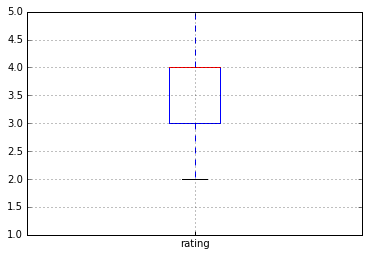

In [298]:
#boxplot the ratings given by technicians for action films

technician_by_action.boxplot(column='rating')